In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
f_pairs = open("pairs\\kitti_10_pairs.txt")
pairs = f_pairs.readlines()
pairs = [pair.replace("\n", "") for pair in pairs]
pairs = [tuple(map(int, pair.replace("(", "").replace(")", "").split(","))) for pair in pairs]

In [116]:
f_poses = open("D:\\datasets\\KITTI_dataset\\KITTI_odometry\\poses\\10.txt")
poses = f_poses.readlines()
poses = [pose.replace("\n", "").split(" ") for pose in poses]

z = []
x = []
for pose in poses:
    z.append(float(pose[11]))
    x.append(float(pose[3]))

x = np.array(x)
z = np.array(z)
    

In [117]:
size = len(z)

loop_gt = np.zeros((size, size))
loop_to_draw = np.zeros((size, size))

In [118]:
for pair in pairs:
    loop_gt[pair[0], pair[1]] = 1
    if pair[0] != pair[1] and abs(pair[0] - pair[1]) > 5:
        loop_to_draw[pair[0], pair[1]] = 1

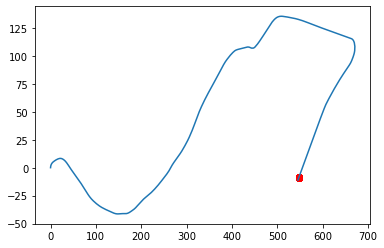

In [119]:
plt.plot(x, z)

indices, _ = np.where(loop_to_draw > 0)

x_coord = x[indices]
z_coord = z[indices]

plt.scatter(x_coord, z_coord, color = "red")